1. Download the Dataset
2. Load the Dataset

In [73]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
data=pd.read_csv("/content/drive/MyDrive/DataSets/Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


3. Perform Below Visualizations.

  ● Univariate Analysis

  ● Bi - Variate Analysis
  
  ● Multi - Variate Analysis

In [76]:
# Uni-Variate Analysis
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [77]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

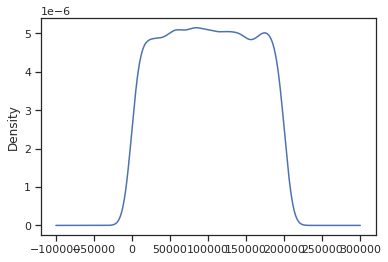

In [78]:
data['EstimatedSalary'].plot(kind="density")

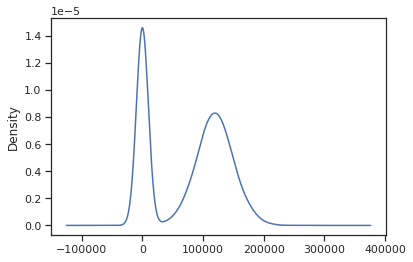

In [79]:
data['Balance'].plot(kind="density")

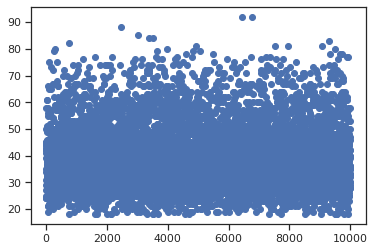

In [80]:
plt.scatter(data.index,data['Age'])

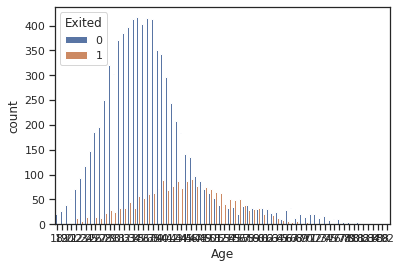

In [81]:
sns.countplot(data=data,x=data['Age'],hue='Exited')

In [82]:
data["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


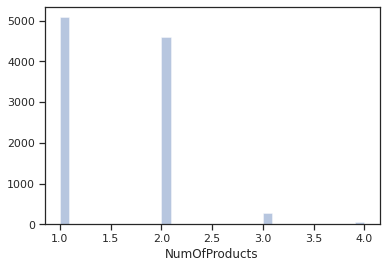

In [83]:
sns.set(style = 'ticks')
sns.distplot(data.NumOfProducts, hist=True, kde=False)

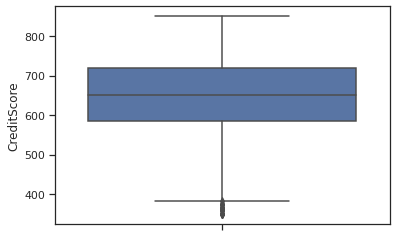

In [84]:
sns.boxplot(y=data['CreditScore'])

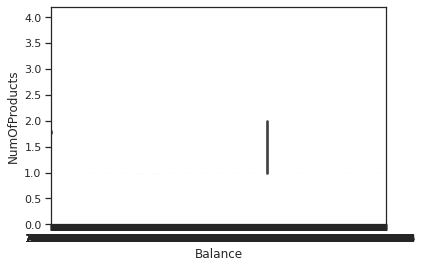

In [85]:
#Bi-Variate Analysis
sns.barplot(x='Balance',y='NumOfProducts',data=data)

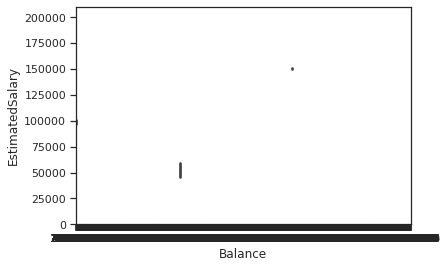

In [86]:
sns.barplot(x='Balance',y='EstimatedSalary',data=data)

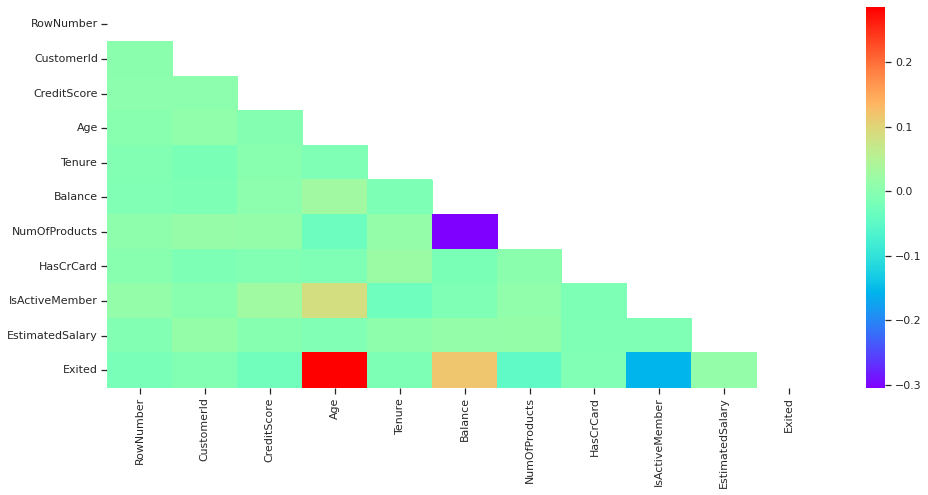

In [87]:
mask=np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots( figsize=(16, 7))
sns.heatmap(data.corr(method='pearson'), mask=mask, cmap='rainbow')

In [88]:
#Multi-Variate Analysis

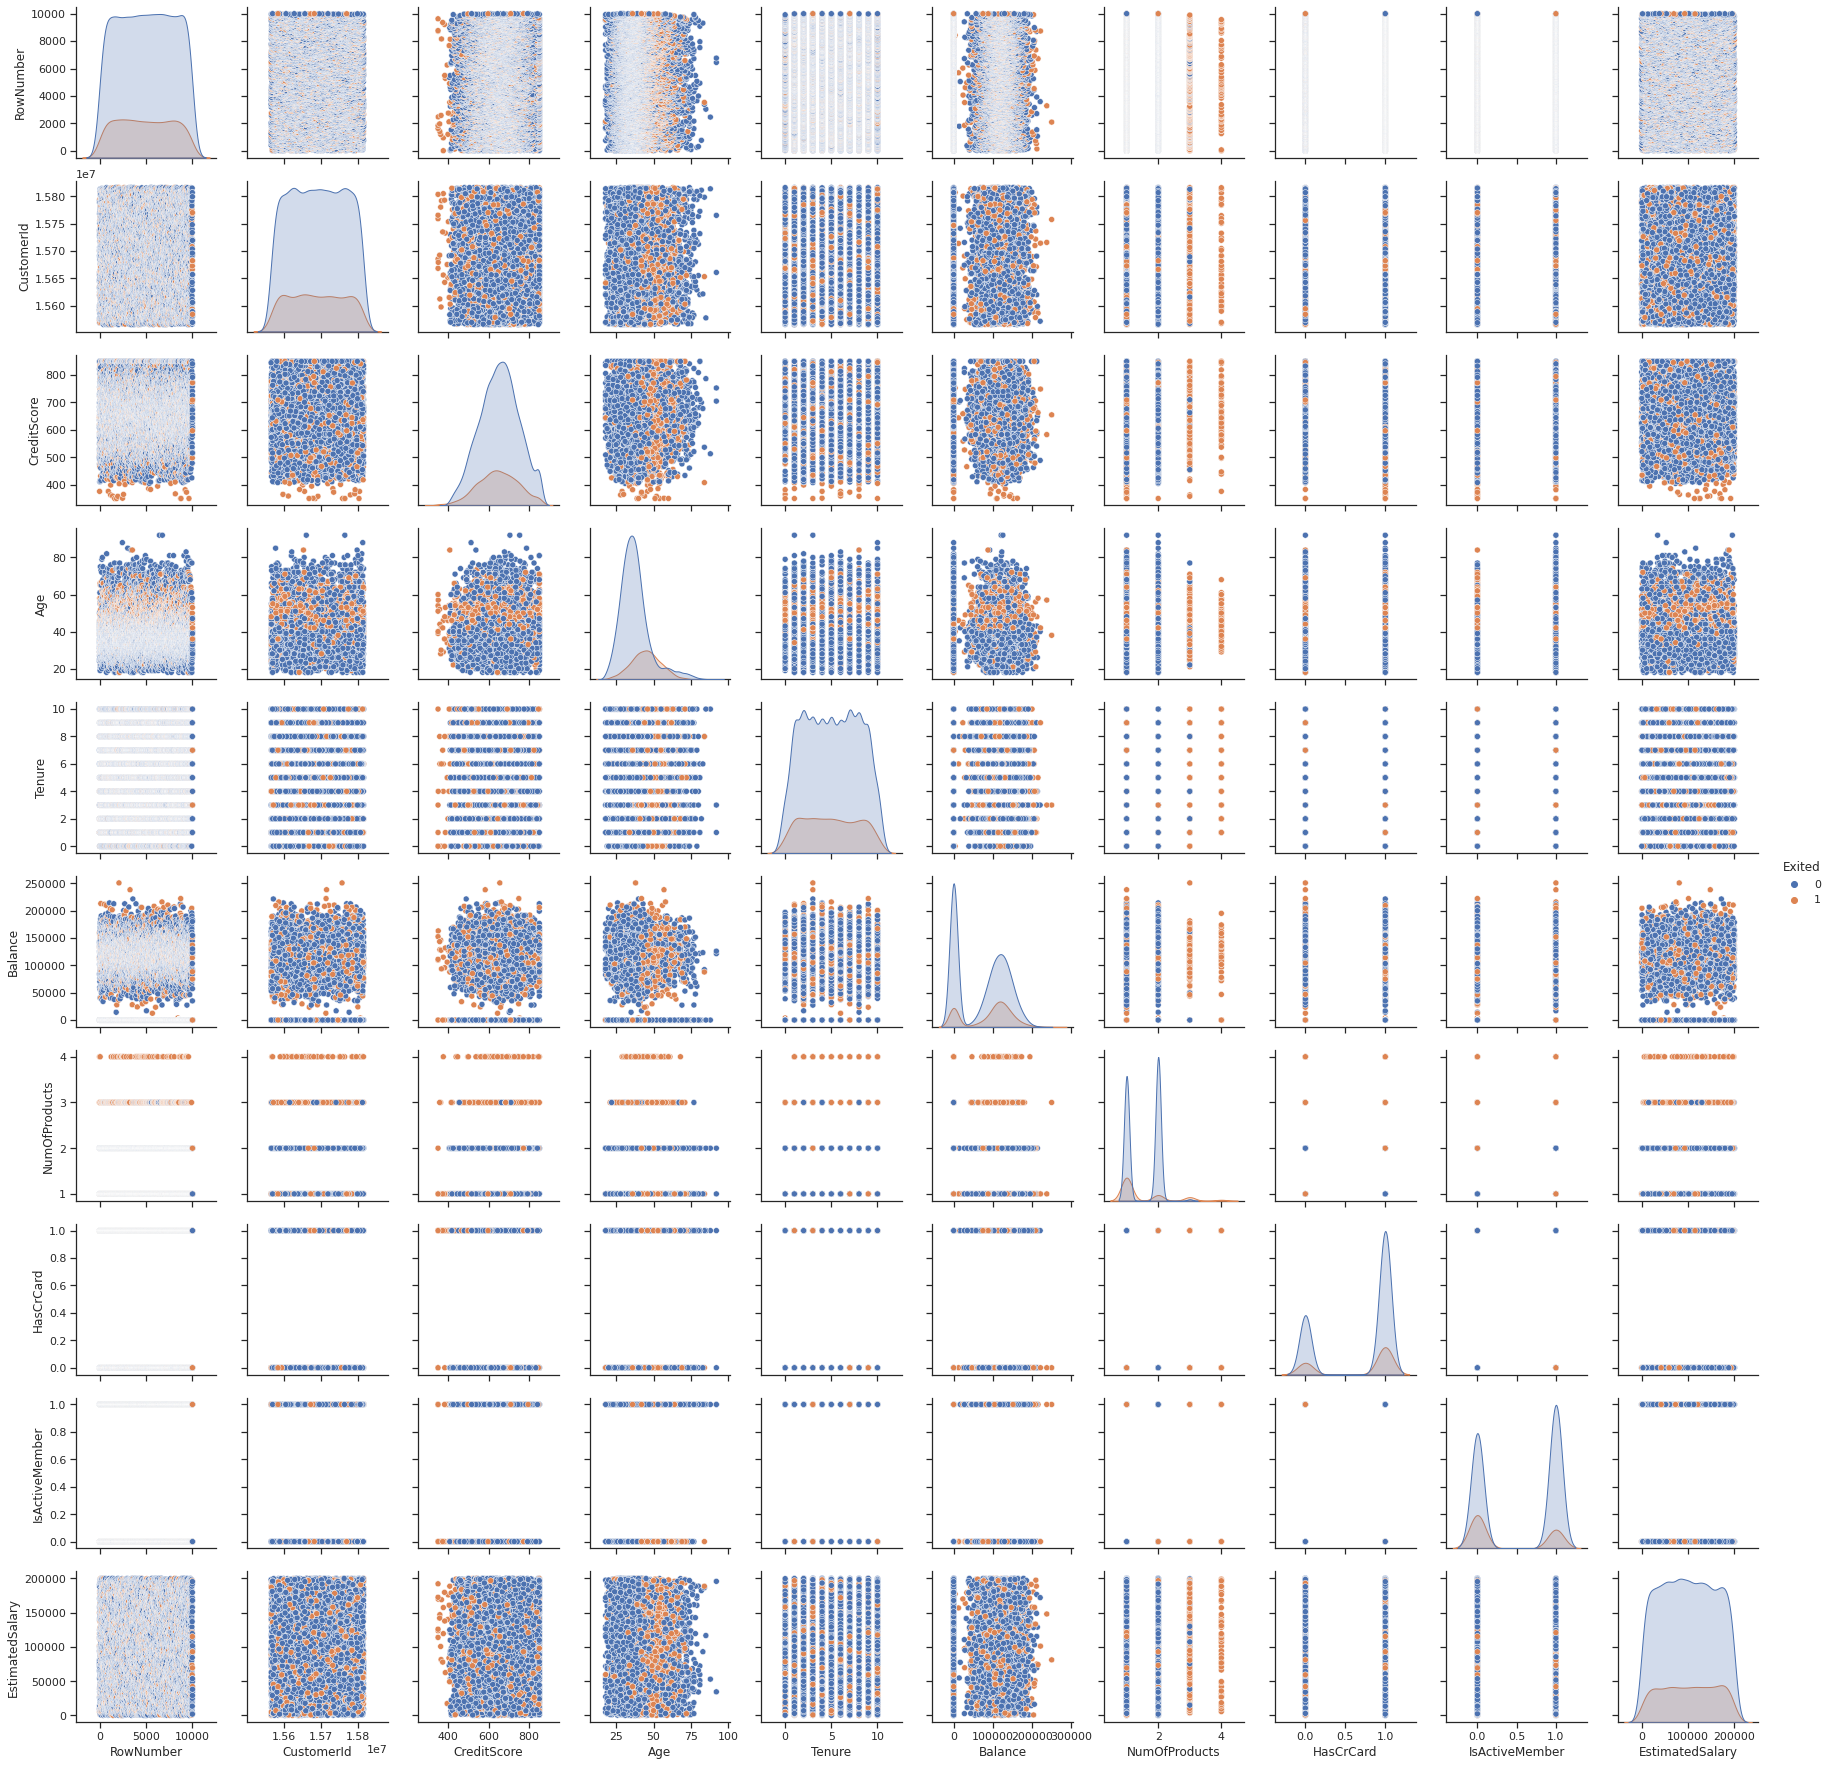

In [89]:
sns.pairplot(data,hue="Exited")

4. Perform descriptive statistics on the dataset

In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


5. Handle the Missing values.

In [ ]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# There are no missing values in the dataset

6. Find the outliers and replace the outliers

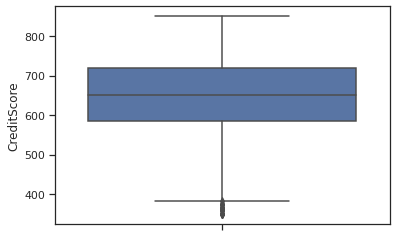

In [ ]:
#Find Outliers
sns.boxplot( y=data['CreditScore'])     

In [ ]:
#Find the outlier Value and create a new data set without outliers
q3 = data["CreditScore"].quantile(0.75)  
q1 = data["CreditScore"].quantile(0.25)
print(q3)
print(q1)
IQR = q3 - q1
lower_limit = q1 - (IQR * 1.5)
print(lower_limit)
upper_limit = q3 + (IQR * 1.5)
print(upper_limit)
CS_outliers = np.where(data["CreditScore"] > upper_limit, True,
                np.where(data["CreditScore"] < lower_limit, True, False))
without_outliers = data.loc[~(CS_outliers)]


718.0
584.0
383.0
919.0


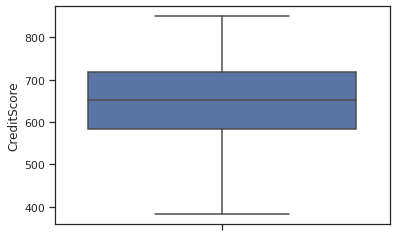

In [ ]:
#Without Outliers
sns.boxplot( y='CreditScore', data=without_outliers)


7. Check for Categorical columns and perform encoding.

In [ ]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
le=LabelEncoder()
data['Geography']=le.fit_transform(data['Geography'])
data['Gender']=le.fit_transform(data['Gender'])


8. Split the data into dependent and independent variables.


In [ ]:
y=data['Exited']
x=data.drop(columns=['Exited','RowNumber','Surname'],axis=1)


9. Scale the independent variables

In [ ]:
col_names=x.columns

In [ ]:
x=scale(x)
x

array([[-0.78321342, -0.32622142, -0.90188624, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.60653412, -0.44003595,  1.51506738, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-0.99588476, -1.53679418, -0.90188624, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [-1.47928179,  0.60498839, -0.90188624, ..., -1.54776799,
         0.97024255, -1.00864308],
       [-0.11935577,  1.25683526,  0.30659057, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [-0.87055909,  1.46377078, -0.90188624, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [ ]:
x=pd.DataFrame(x,columns=col_names) #Convert the array back to the DataFrame


10. Split the data into training and testing

In [ ]:
x_train,x_text,y_train,y_test=train_test_split(x,y,test_size=0.2)